<a href="https://colab.research.google.com/github/manasik29/Support_Vector_Machines/blob/main/SVM_Salary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

1) Prepare a classification model using SVM for salary data 

**Data Description:**

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual

**Load dataset and libraries along with basic EDA**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

df_train = pd.read_csv('/content/SalaryData_Train(1).csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df_train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
df_train.shape

(30161, 14)

In [56]:
df_test = pd.read_csv('/content/SalaryData_Test(1).csv')
df_test.shape

(15060, 14)

In [57]:
#merge the 2 dataset for analysis
df = df_train.append(df_test)
df.shape

(45221, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [58]:
#educationno and education depicts the same thing, we can go ahead and delete one
df.drop('educationno', axis=1, inplace=True)

In [111]:
df.shape

(45221, 13)

In [59]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**EDA & Feature Engineering**

In [7]:
#check for missing values
df.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

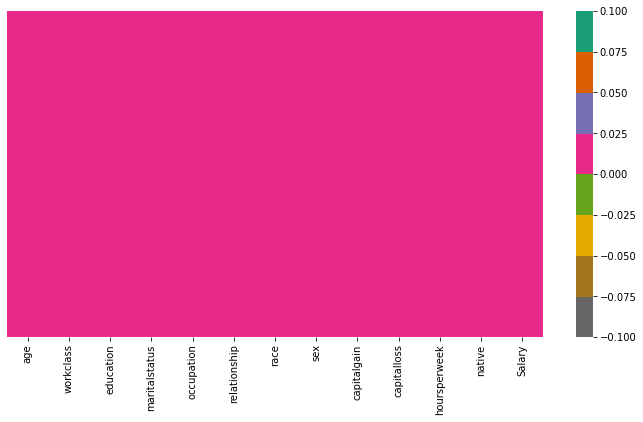

In [ ]:
sns.heatmap(df.isnull(), cmap = ('Dark2_r'), yticklabels=False, )

In [ ]:
df.dtypes

age               int64
workclass        object
education        object
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

Observations:

- No missing values.
- No incorrect data types.

**Data Visualisation**

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

    index  Salary
0   <=50K   34013
1    >50K   11208


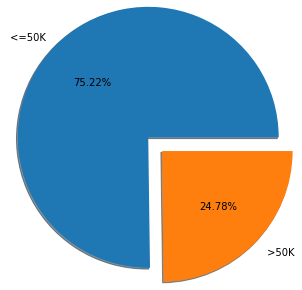

In [ ]:
plt.rcParams['figure.figsize']=(3,3)
plt.pie(df.Salary.value_counts().values, labels = df.Salary.value_counts().index, autopct="%1.2f%%", radius =2, shadow=True, explode=(0,0.3))
print(df.Salary.value_counts().reset_index())

In [ ]:
workclass_df = df.groupby(['Salary', 'workclass']).size().reset_index().rename(columns={0:'Num of individuals'})
workclass_df

Text(0.5, 1.1, 'Workclass of individuals to corresponding Salary')

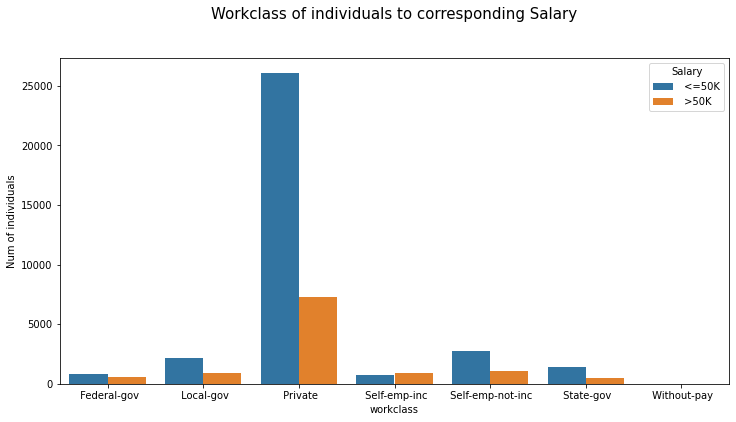

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x = 'workclass', y='Num of individuals', hue='Salary', data=workclass_df)
plt.title("Workclass of individuals to corresponding Salary", y = 1.1, fontsize=15)

**Observation:**

- Most individuals are into private jobs with Salary <=50k.

- In our data there are very less individual who are without pay opr unemployed.

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
edu_df = df.groupby(['Salary', 'education']).size().reset_index().rename(columns={0:'Num of individuals'})
edu_df

Text(0.5, 1.03, 'Education of individuals to corresponding Salary')

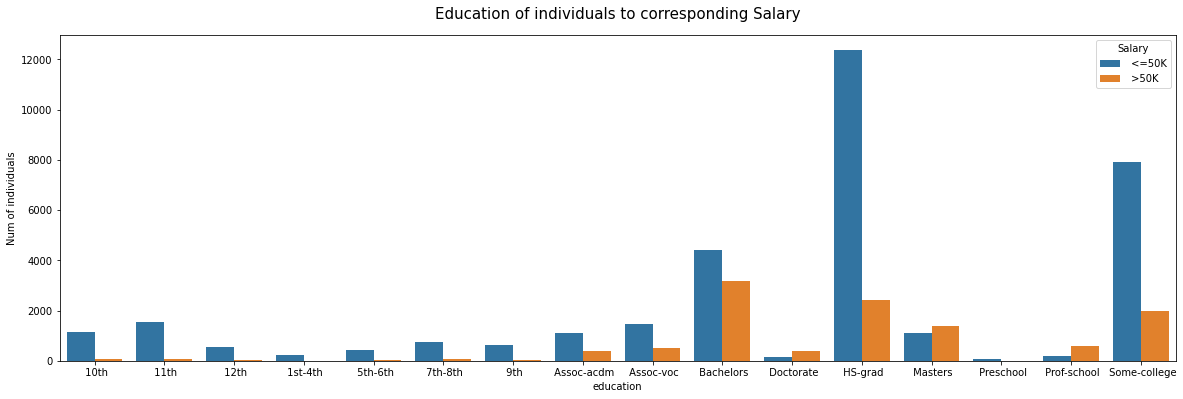

In [12]:
plt.rcParams['figure.figsize']=(20,6)
sns.barplot(x = 'education', y='Num of individuals', hue = 'Salary', data=edu_df)
plt.title("Education of individuals to corresponding Salary", y = 1.03, fontsize=15)

**Observations:**

- Most of the individuals have studied for 9 years.
- Then the highest rankings are individuals who have studied for 10 & 13 years.

In [ ]:
rel_df = df.groupby(['maritalstatus', 'relationship', 'Salary']).size().reset_index().rename(columns={0:'Num of indv'})
rel_df

Text(0.5, 1.1, 'Salary category wrt Marital status')

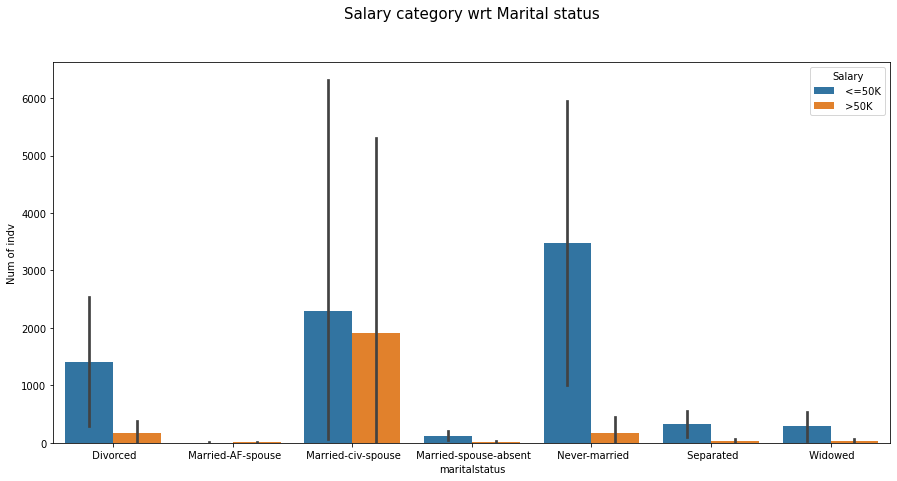

In [ ]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x= 'maritalstatus', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Marital status", y = 1.1, fontsize=15)

- Most individuals in our data are who have never married and are earning <=50k.

- Then we have individuals who are married indv earning <=50k and then married indv earning >50k.

Text(0.5, 1.1, 'Salary category wrt Relationship')

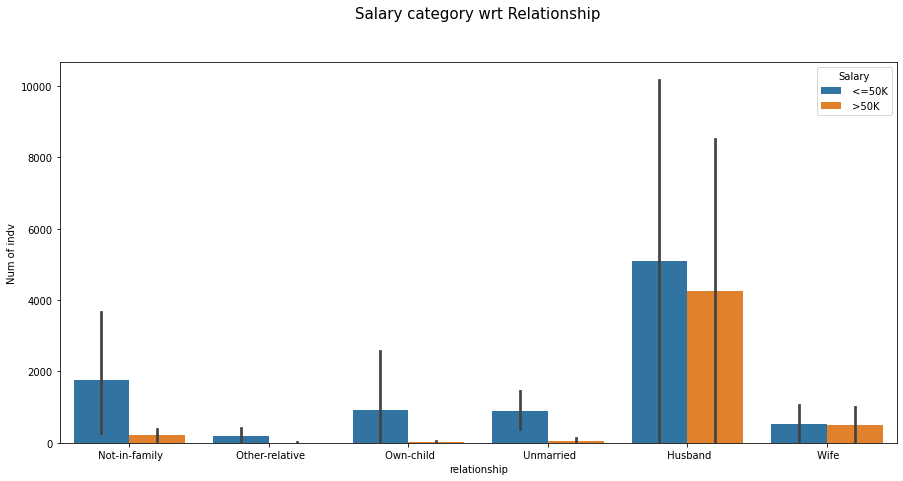

In [ ]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x= 'relationship', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Relationship", y = 1.1, fontsize=15)

- By this graph we can futher confirm that indv who are married, who have a husband are higher and are earning <=50k and >50k.

In [29]:
occ_df = df.groupby(['occupation', 'workclass', 'Salary']).size().reset_index().rename(columns={0:'Num of Indv'})
occ_df_sort = occ_df.sort_values('Num of Indv', ascending=False)

In [ ]:
occ_df_sort.head()

Text(0.5, 1.01, 'Diff occupations with corresponding workclass')

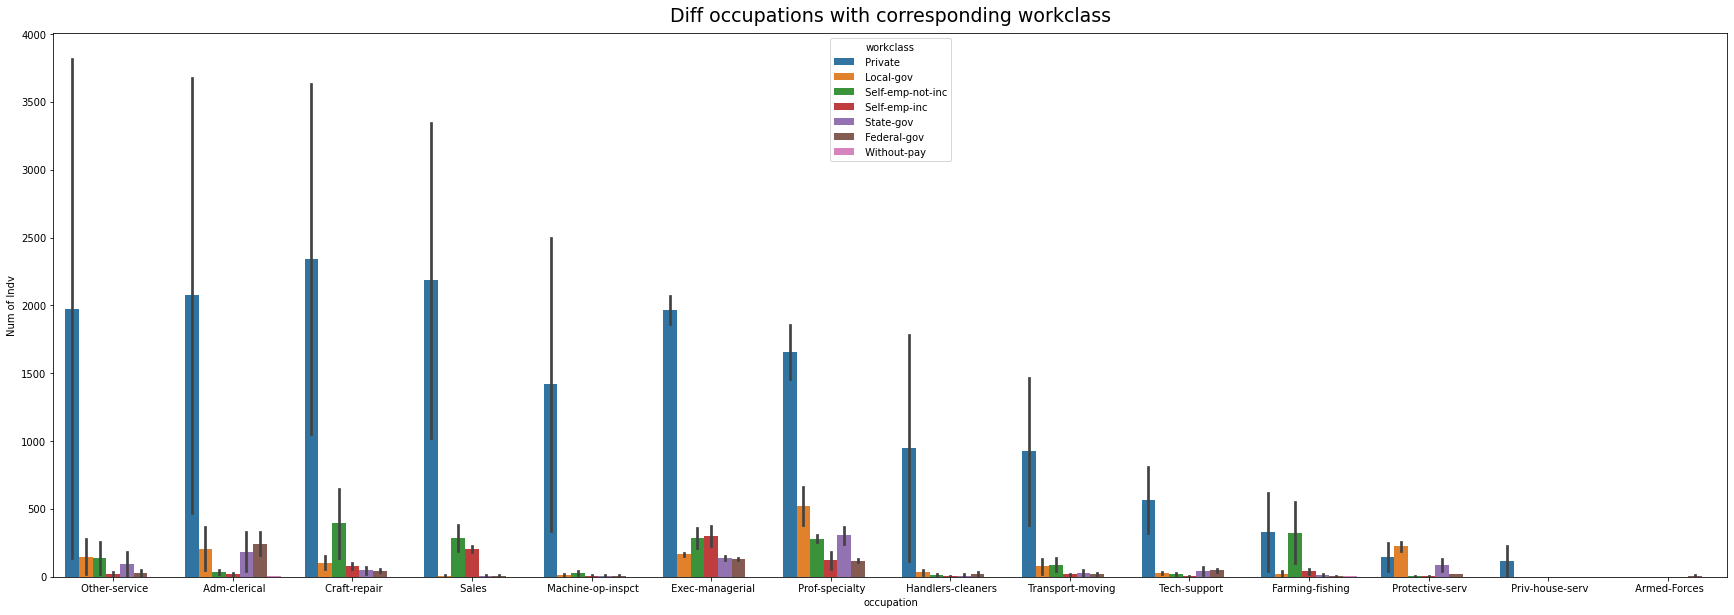

In [39]:
plt.rcParams['figure.figsize']=(30,10)
sns.barplot(x='occupation', y = 'Num of Indv', hue='workclass', data=occ_df_sort)
plt.title("Diff occupations with corresponding workclass", y=1.01, fontsize=19)

**Observation:**

- Private workclass indvs are highest in all occupations, except Protective-serv.

- Highest num of indv are working in Other-service then Adm-clerical, then Craft-repair.

Text(0.5, 1.01, 'Salary categories corresponding to diff occupation')

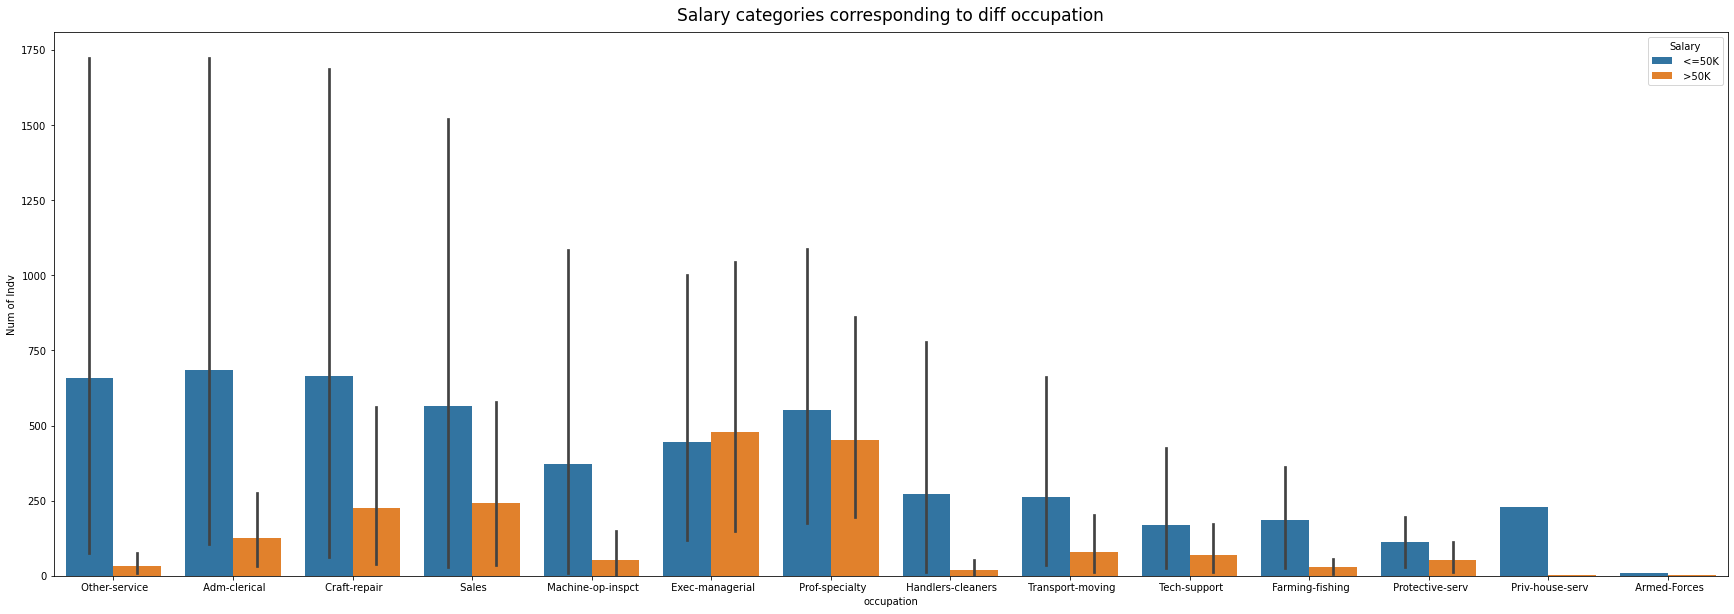

In [37]:
sns.barplot(x='occupation', y='Num of Indv', hue='Salary', data=occ_df_sort)
plt.title("Salary categories corresponding to diff occupation", y=1.01, fontsize=17)

In [ ]:
race_df = df.groupby(['Salary', 'race']).size().reset_index().rename(columns={0:'Num of indv'})
race_df_sort = race_df.sort_values('Num of indv', ascending=False)
race_df_sort

Text(0.5, 1.02, 'Salary dist according to race')

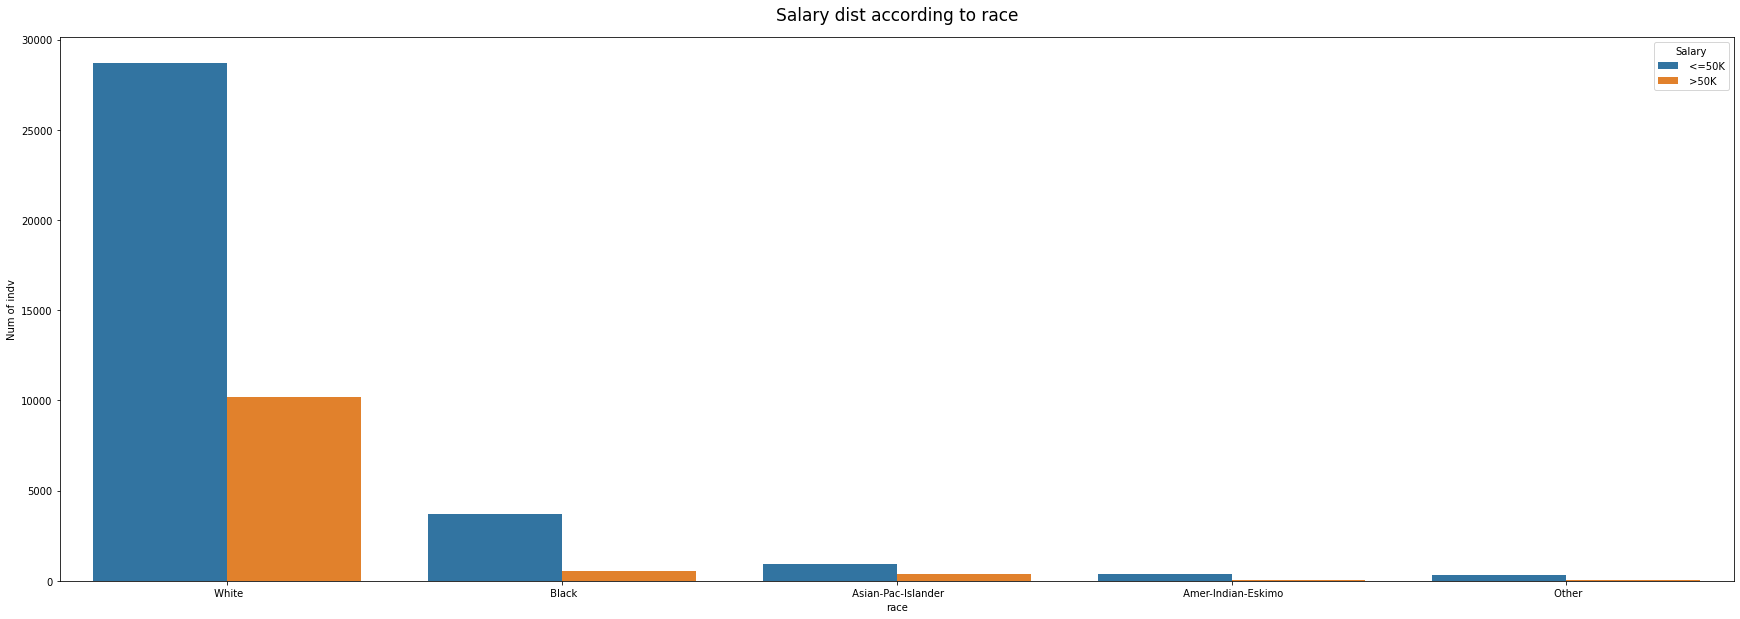

In [45]:
sns.barplot(x = 'race', y='Num of indv', hue='Salary', data=race_df_sort)
plt.title("Salary dist according to race", y=1.02, fontsize=17)

**Observation:**

- It is very evident that indv of race 'white' have the highest in our data and in both salary category <=50k and >50k. 

In [ ]:
sex_df = df.groupby(['Salary', 'sex']).size().reset_index().rename(columns={0:'Num of indv'})
sex_df_sort = sex_df.sort_values('Num of indv', ascending=False)
sex_df_sort

Text(0.5, 1.02, 'Salary dist according to sex')

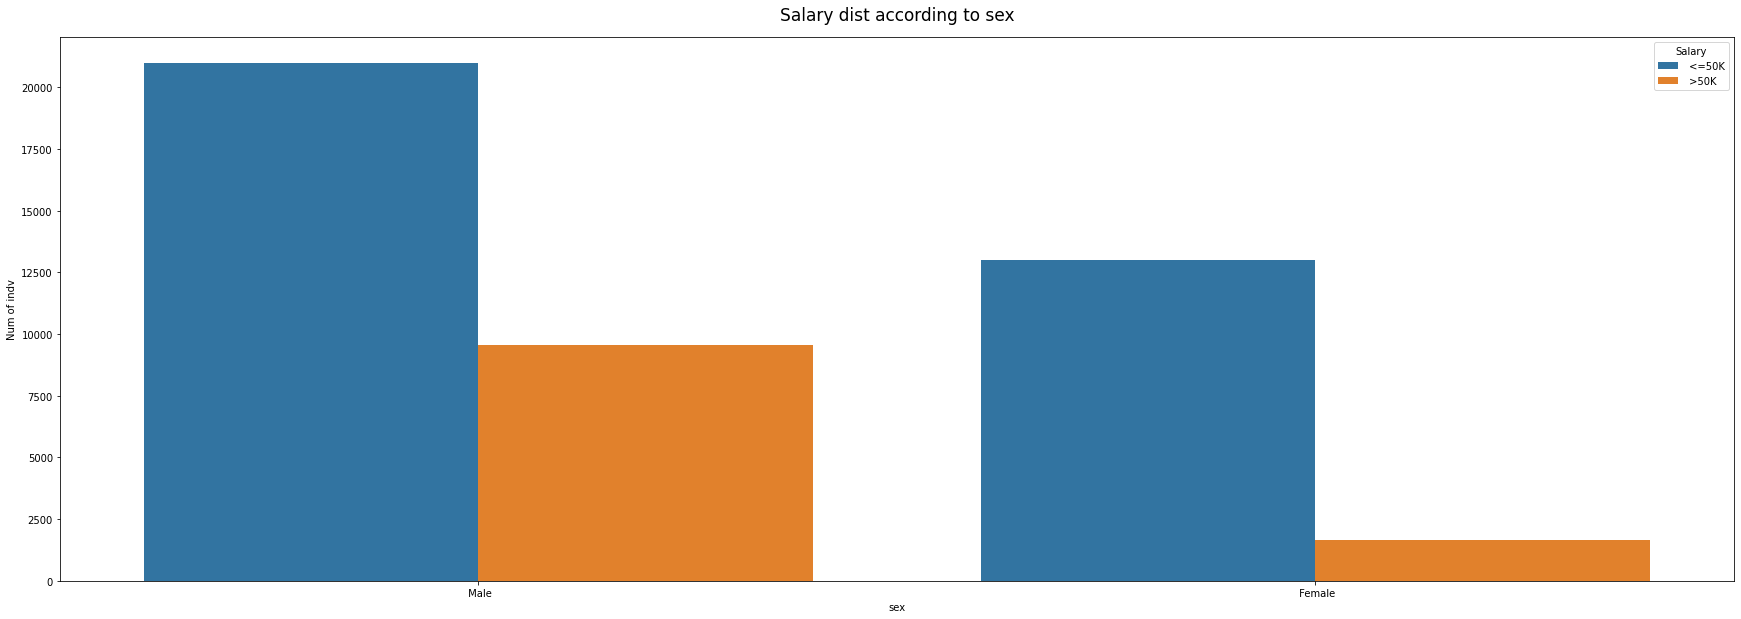

In [49]:
sns.barplot(x = 'sex', y='Num of indv', hue='Salary', data=sex_df_sort)
plt.title("Salary dist according to sex", y=1.02, fontsize=17)

- Overall trend is male are doing more jobs than female and have higher ratio in both salary categories.

In [ ]:
nat_df = df.groupby(['Salary','native']).size().reset_index().rename(columns={0:'Num of indv'})
nat_df_sort = nat_df.sort_values('Num of indv', ascending=False)
nat_df_sort.head()

Text(0.5, 1.01, 'Top 10 native locations corresponding to Salary')

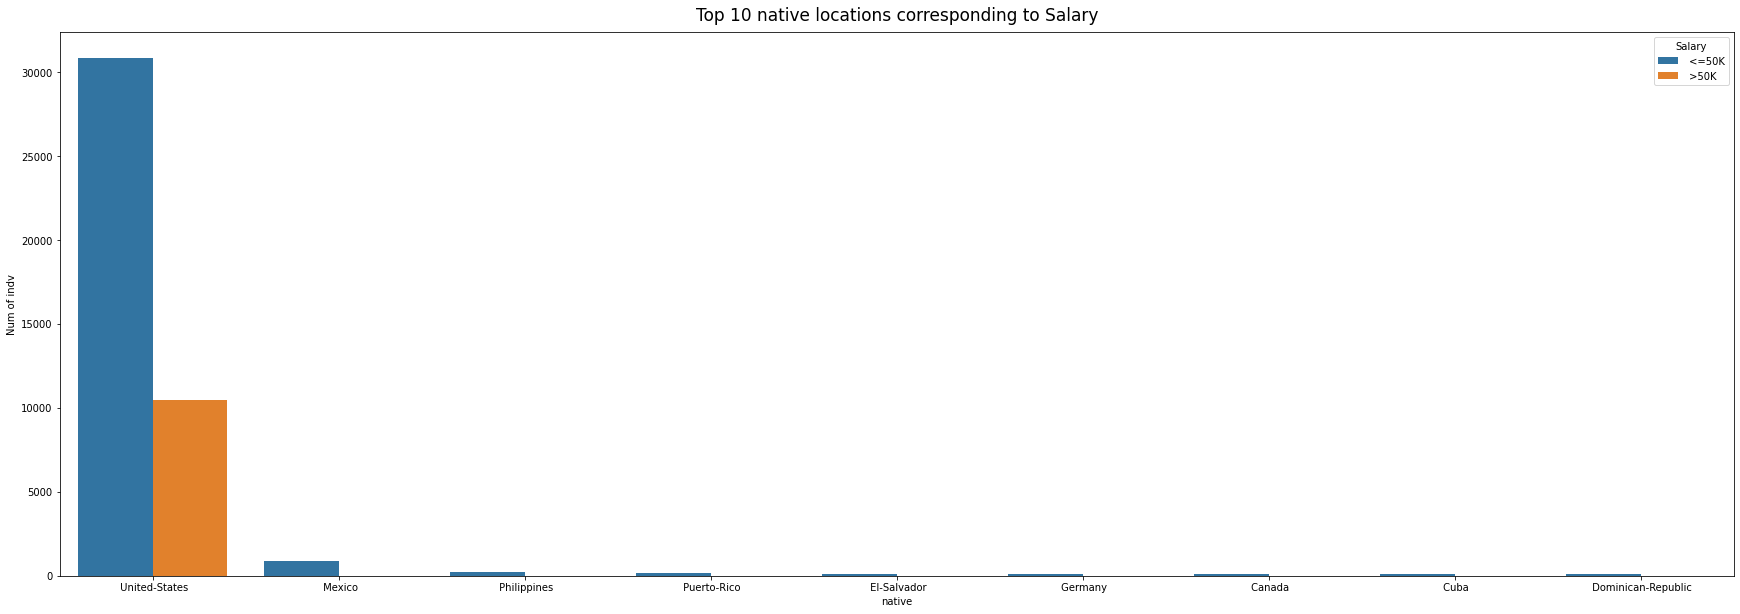

In [75]:
sns.barplot(x='native', y='Num of indv', hue='Salary', data=nat_df_sort.head(10))
plt.title("Top 10 native locations corresponding to Salary", fontsize=17, y=1.01)

**Observation**

- Majority of indv are native to US.
- Then next ranks go to Mexico, Philippines and Puerto-Rico

In [76]:
df.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

**Label Encoding**

In [60]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])

In [6]:
df.head()            #0 - <=50K, 1- >50K

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Text(0.5, 1.01, 'Age diff for salary category')

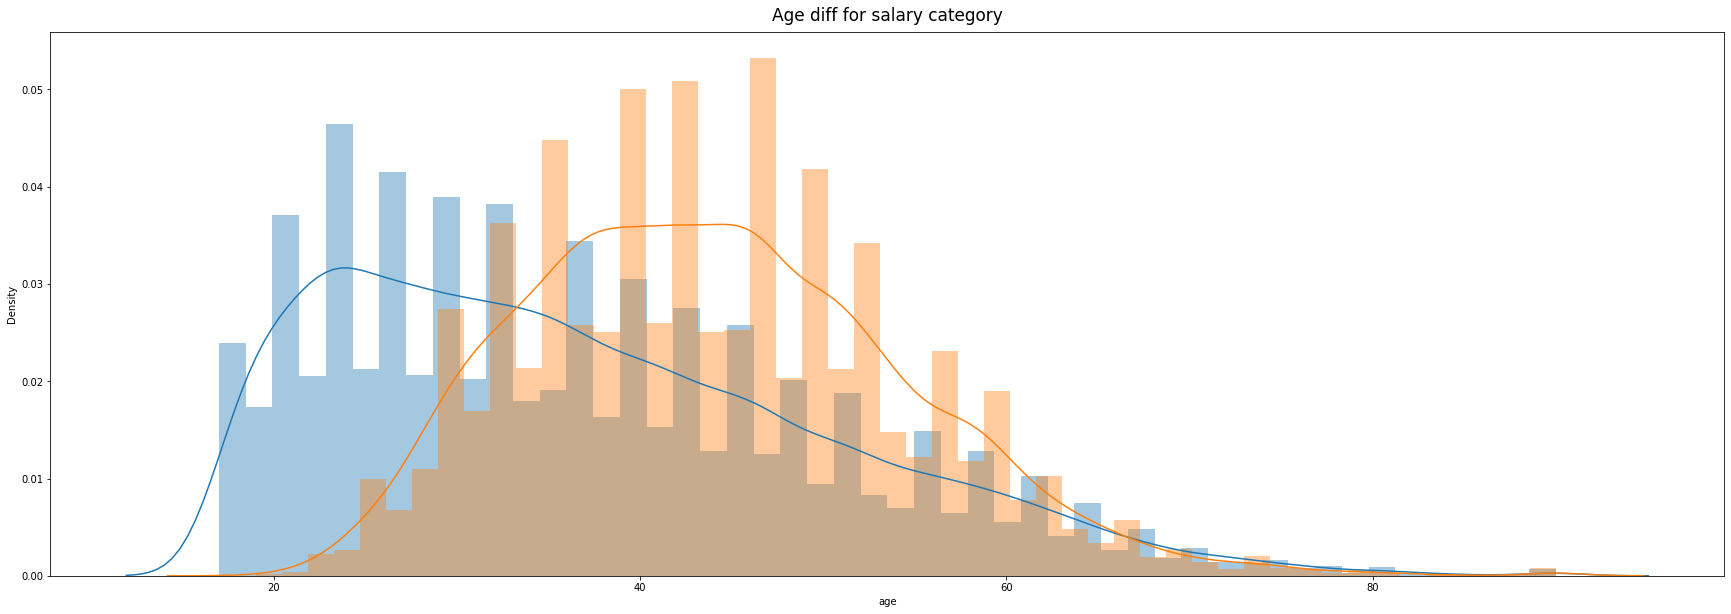

In [85]:
sns.distplot(df[df['Salary']==0]['age'])
sns.distplot(df[df['Salary']==1]['age'])                 #orange for Salary>50K, blue for Salary<=50K
plt.title("Age diff for salary category", y=1.01, fontsize=17)

**Observation:**

- Indv who have Salary<=50K are relatively younger.
- Indv who have Salary>50K are comparitively older.

Text(0.5, 1.01, 'Capital Gain and Loss for salary <=50K')

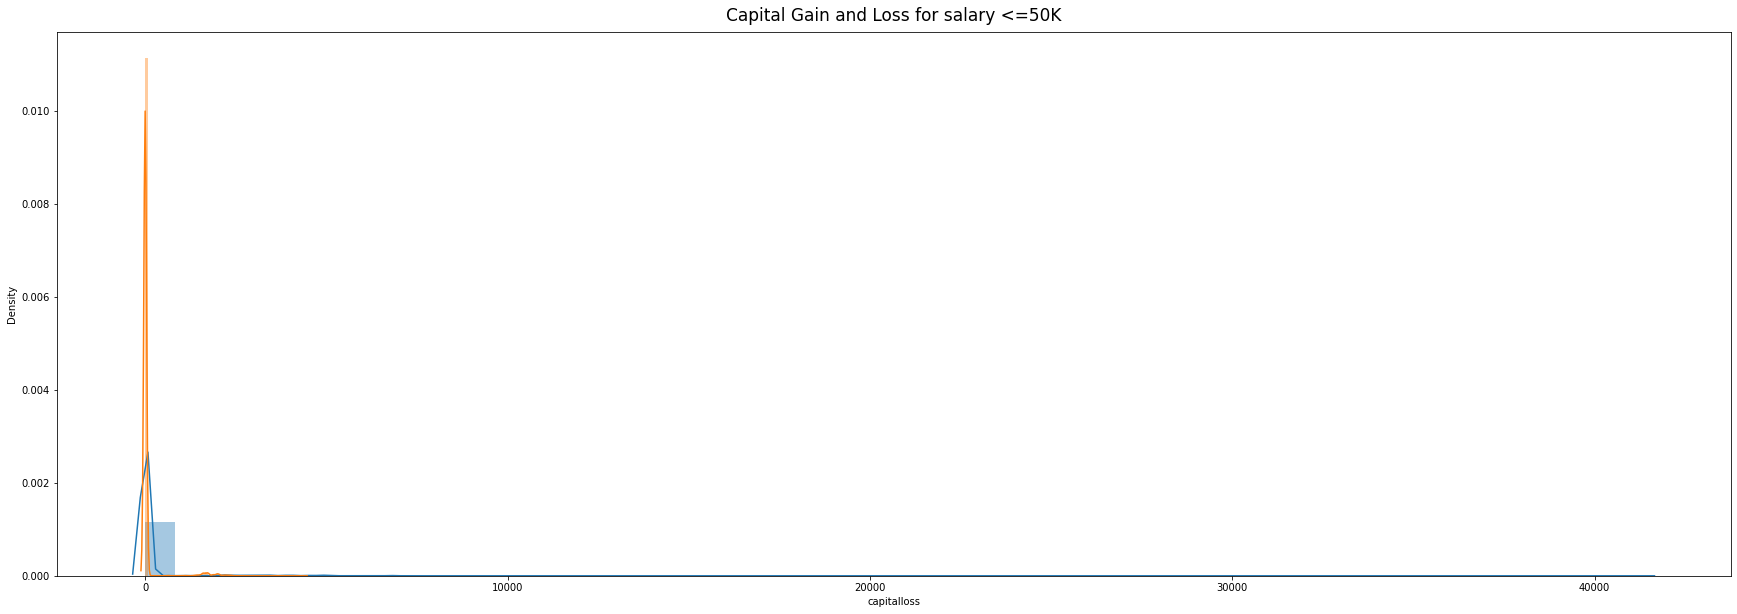

In [99]:
sns.distplot(df[df['Salary']==0]['capitalgain'])
sns.distplot(df[df['Salary']==0]['capitalloss'])    
plt.title("Capital Gain and Loss for salary <=50K", y=1.01, fontsize=17)      #orange for capitalloss, blue for capitalgain                

- Data is highly skewed.
- Capital gain has a very large range from 0-45000, whereas capital loss has 
lower range from 0-5000.
- Capital Loss for salaried indv <=50k are very high than capital gain.

Text(0.5, 1.01, 'Capital Gain and Loss for salary >50K')

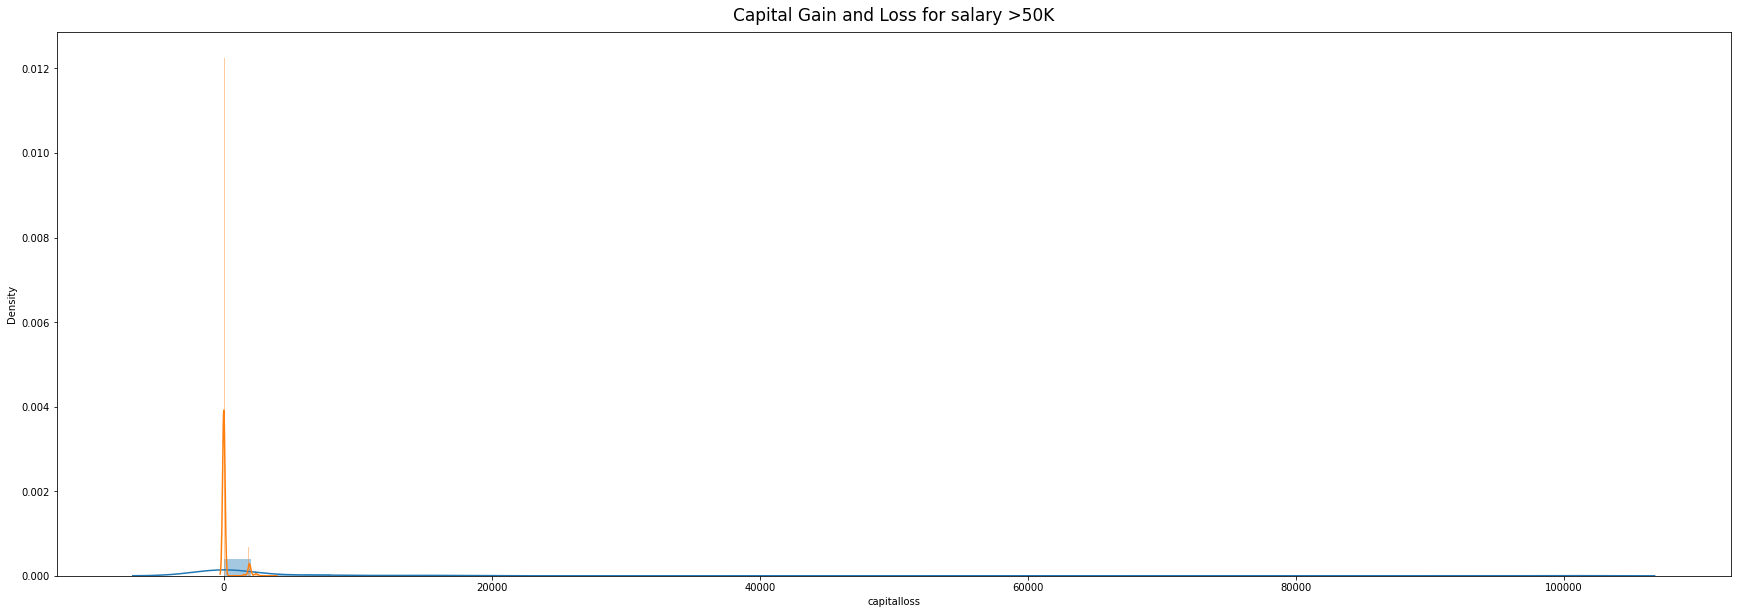

In [97]:
sns.distplot(df[df['Salary']==1]['capitalgain'])
sns.distplot(df[df['Salary']==1]['capitalloss'])     
plt.title("Capital Gain and Loss for salary >50K", y=1.01, fontsize=17)           #orange for capital loss, blue for capital gain

- Data is highly skewed.
- Capital gain has a very large range from 0-100000, whereas capital loss has lower range from 0-4000.
- Capital Loss for salaried indv >50k are very high than capital gain.

Text(0.5, 1.01, 'Hours worked per week for diff salary category')

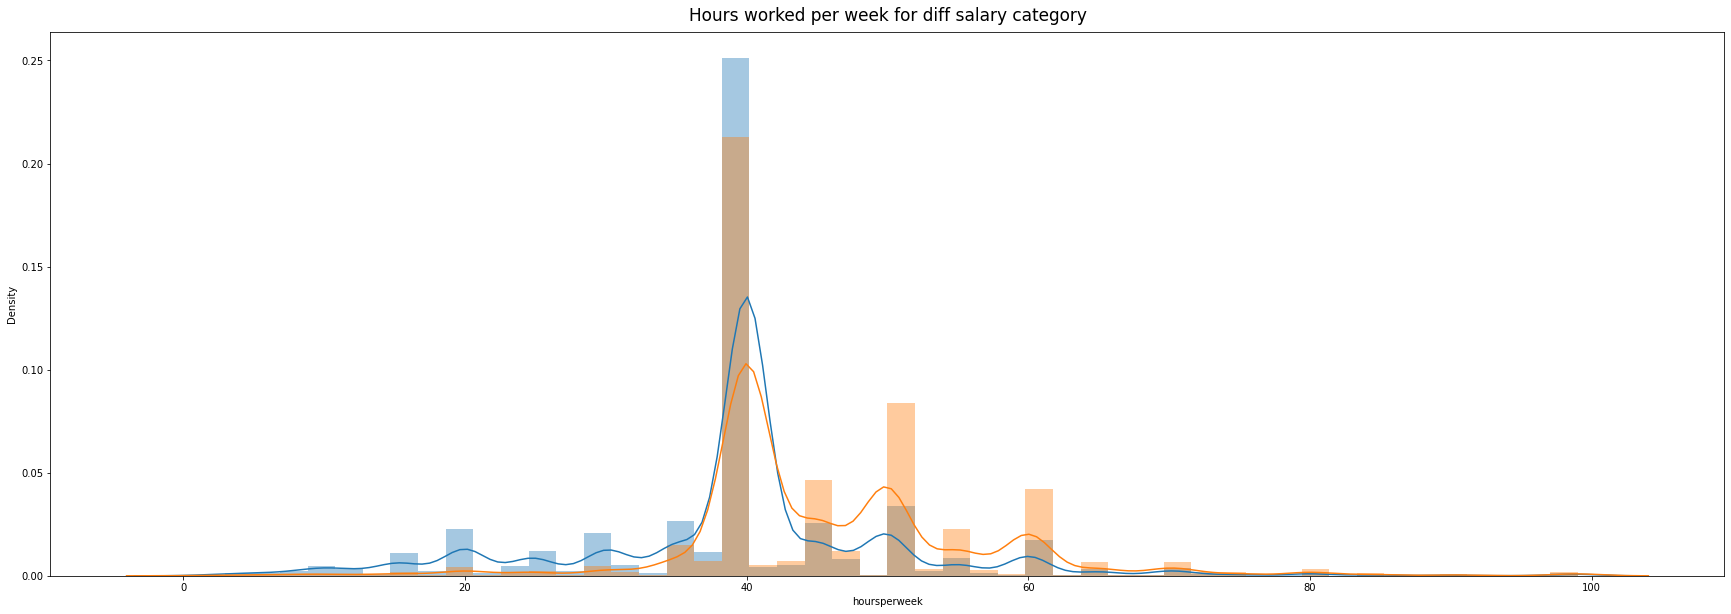

In [102]:
sns.distplot(df[df['Salary']==0]['hoursperweek'])
sns.distplot(df[df['Salary']==1]['hoursperweek'])     
plt.title("Hours worked per week for diff salary category", y=1.01, fontsize=17)           #orange for salary > 50K, blue for salary<=50K

- Work hours for max indv are between 37-50 hours.

- We can observe work hours are widely distributed for salary category >50K i.e between 35-60 hrs. 

**Relation of "Target variable" with other features.**

In [18]:
#Correlation of continuous variable with target variable
corr_s = df.corr().iloc[:,-1].reset_index().rename(columns={'index':'feature', 'Salary':'corr'}) 
corr_s

,feature,corr
0,age,0.237035
1,capitalgain,0.221033
2,capitalloss,0.148799
3,hoursperweek,0.227199
4,Salary,1.000000


Text(0.5, 1.01, 'Corr of continuous features with Target variable')

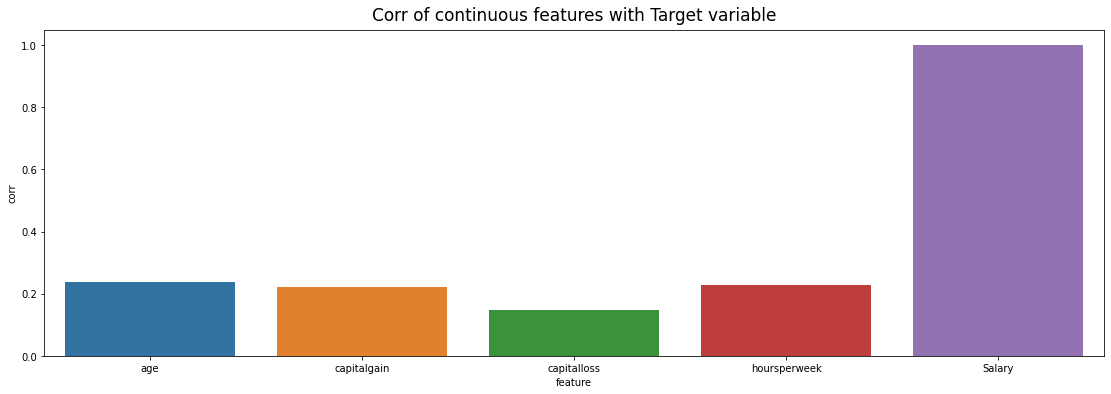

In [30]:
sns.barplot(x='feature', y='corr', data=corr_s)
plt.title("Corr of continuous features with Target variable", fontsize=17, y=1.01)

- All countinuous variables have positive correlation with Target variable - Salary.

In [ ]:
!pip install ppscore

In [28]:
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['x']=='Salary']
score_s

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
156,Salary,age,4.018066e-02,regression,True,mean absolute error,10.770200,10.337446,DecisionTreeRegressor()
157,Salary,workclass,1.647983e-07,classification,True,weighted F1,0.633179,0.633179,DecisionTreeClassifier()
158,Salary,education,1.021341e-02,classification,True,weighted F1,0.205200,0.213318,DecisionTreeClassifier()
159,Salary,maritalstatus,1.805044e-01,classification,True,weighted F1,0.335200,0.455199,DecisionTreeClassifier()
160,Salary,occupation,0.000000e+00,classification,True,weighted F1,0.110800,0.080664,DecisionTreeClassifier()
161,Salary,relationship,1.032196e-01,classification,True,weighted F1,0.278000,0.352525,DecisionTreeClassifier()
162,Salary,race,0.000000e+00,classification,True,weighted F1,0.808948,0.808948,DecisionTreeClassifier()
163,Salary,sex,0.000000e+00,classification,True,weighted F1,0.565600,0.549702,DecisionTreeClassifier()
164,Salary,capitalgain,0.000000e+00,regression,True,mean absolute error,965.027600,1594.005498,DecisionTreeRegressor()
165,Salary,capitalloss,0.000000e+00,regression,True,mean absolute error,84.345000,159.137605,DecisionTreeRegressor()


Text(0.5, 1.01, 'PPScore of each feature with Target variable')

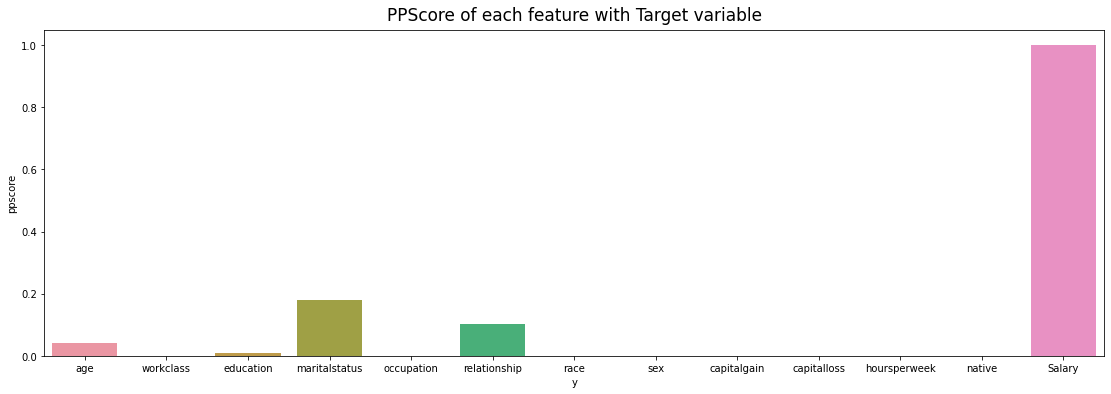

In [29]:
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='y', y='ppscore', data=score_s)
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

- Marital status, relationship, age have ppscore among all the fetures.

**Data Preprocessing**

In [61]:
df1=df.reset_index()
df = df1.drop('index', axis=1)
df

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
45217,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
45218,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
45219,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


**Handle categorical features**

In [81]:
df['workclass'] = df['workclass'].map({' State-gov':1, ' Self-emp-not-inc':2, ' Private' :3, ' Federal-gov':4, ' Local-gov':5,
                                       ' Self-emp-inc':6,' Without-pay' : 7})

In [88]:
df['maritalstatus'] = df['maritalstatus'].map({' Never-married':1, ' Married-civ-spouse':2, ' Divorced':3,
       ' Married-spouse-absent':4, ' Separated':5, ' Married-AF-spouse':6,
       ' Widowed':7})

In [91]:
df['occupation'] = df['occupation'].map({' Adm-clerical':1, ' Exec-managerial':2, ' Handlers-cleaners':3,
       ' Prof-specialty':4, ' Other-service':5, ' Sales':5, ' Transport-moving':6,
       ' Farming-fishing':7, ' Machine-op-inspct':8, ' Tech-support':9,
       ' Craft-repair':10, ' Protective-serv':11, ' Armed-Forces':12,
       ' Priv-house-serv':12})

In [94]:
df['relationship'] = df['relationship'].map({' Not-in-family':1, ' Husband':2, ' Wife':3, ' Own-child':4, ' Unmarried':5,
       ' Other-relative':6})

In [97]:
df['race'] = df['race'].map({' White':1, ' Black':2, ' Asian-Pac-Islander':3, ' Amer-Indian-Eskimo':4,
       ' Other':5})

In [99]:
df['sex'] = df['sex'].map({' Male':1, ' Female':2})

In [102]:
df['native'] = df['native'].map({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' Mexico':5,
       ' Puerto-Rico':6, ' Honduras':7, ' England':8, ' Canada':9, ' Germany':10,
       ' Iran':11, ' Philippines':12, ' Poland':13, ' Columbia':14, ' Cambodia':15,
       ' Thailand':16, ' Ecuador':17, ' Laos':18, ' Taiwan':19, ' Haiti':20, ' Portugal':21,
       ' Dominican-Republic':22, ' El-Salvador':23, ' France':24, ' Guatemala':25,
       ' Italy':26, ' China':27, ' South':28, ' Japan':29, ' Yugoslavia':30, ' Peru':31,
       ' Outlying-US(Guam-USVI-etc)':32, ' Scotland':33, ' Trinadad&Tobago':34,
       ' Greece':35, ' Nicaragua':36, ' Vietnam':37, ' Hong':38, ' Ireland':39,
       ' Hungary':40})

In [84]:
df['education'] = df['education'].map({' Bachelors':1, ' HS-grad':2, ' 11th' :3,  ' Masters':4, ' 9th':5,
                                       ' Some-college':6,' Assoc-acdm' : 7, ' 7th-8th':8, ' Doctorate':9,
       ' Assoc-voc':10, ' Prof-school':11, ' 5th-6th':12, ' 10th':13, ' Preschool':14,
       ' 12th':15, ' 1st-4th':16})

In [104]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,1,1,1,1,1,1,1,2174,0,40,1,0
1,50,2,1,2,2,2,1,1,0,0,13,1,0
2,38,3,2,3,3,1,1,1,0,0,40,1,0
3,53,3,3,2,3,2,2,1,0,0,40,1,0
4,28,3,1,2,4,3,2,2,0,0,40,2,0


- All the features are now in numerical form. 

In [105]:
df.shape

(45221, 13)

In [116]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:17])
outliers = data1[data1['anamoly']==-1]

In [118]:
outliers.index

Int64Index([ 1678,  2231,  2648,  2669,  3068,  6497,  8044,  8995, 11654,
            12895, 15999, 16249, 16318, 19371, 19396, 19503, 19896, 20812,
            21732, 22529, 22695, 25159, 25186, 25578, 25862, 26195, 26701,
            27565, 29957, 33180, 33871, 34583, 35491, 35987, 36220, 37764,
            37904, 39278, 39434, 39819, 40420, 42336, 42563, 43486, 44505,
            44590],
           dtype='int64')

In [120]:
df.drop([1678,  2231,  2648,  2669,  3068,  6497,  8044,  8995, 11654,
            12895, 15999, 16249, 16318, 19371, 19396, 19503, 19896, 20812,
            21732, 22529, 22695, 25159, 25186, 25578, 25862, 26195, 26701,
            27565, 29957, 33180, 33871, 34583, 35491, 35987, 36220, 37764,
            37904, 39278, 39434, 39819, 40420, 42336, 42563, 43486, 44505,
            44590],axis=0, inplace=True)

In [121]:
df.shape

(45175, 13)

**Splitting data into target variable and independent variables**

In [122]:
data=df.copy()

In [125]:
x=data.drop('Salary', axis=1)
y = data['Salary']

In [142]:
#Standardize?Normalize the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)            #data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)            #data between -1 to +1   

In [143]:
x_std.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.035720,-2.245242,-0.980950,-0.881261,-1.380788,-1.059232,-0.344033,-0.693438,0.147698,-0.218045,-0.078353,-0.236991
1,0.869183,-1.180328,-0.980950,-0.062088,-1.048995,-0.360864,-0.344033,-0.693438,-0.146441,-0.218045,-2.330805,-0.236991
2,-0.040049,-0.115414,-0.693258,0.757084,-0.717202,-1.059232,-0.344033,-0.693438,-0.146441,-0.218045,-0.078353,-0.236991
3,1.096491,-0.115414,-0.405565,-0.062088,-0.717202,-0.360864,1.292796,-0.693438,-0.146441,-0.218045,-0.078353,-0.236991
4,-0.797742,-0.115414,-0.980950,-0.062088,-0.385409,0.337505,1.292796,1.442090,-0.146441,-0.218045,-0.078353,-0.031744


In [144]:
x_norm.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.02174,0.0,0.397959,0.000000
1,0.452055,0.166667,0.000000,0.166667,0.090909,0.2,0.00,0.0,0.00000,0.0,0.122449,0.000000
2,0.287671,0.333333,0.066667,0.333333,0.181818,0.0,0.00,0.0,0.00000,0.0,0.397959,0.000000
3,0.493151,0.333333,0.133333,0.166667,0.181818,0.2,0.25,0.0,0.00000,0.0,0.397959,0.000000
4,0.150685,0.333333,0.000000,0.166667,0.272727,0.4,0.25,1.0,0.00000,0.0,0.397959,0.025641


In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [146]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((30267, 12), (14908, 12), (30267,), (14908,))

**Buid a Model**

**Grid Search CV**

**Kernel - RBF**

In [ ]:
x_trn = x_train.iloc[0:500,:]
y_trn = y_train.iloc[0:500]